[<img align="right" width="200" height="200" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/)

Pankaj Rajoria ([p.rajoria@tu-braunschweig.de](p.rajoria@tu-braunschweig.de))

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
***

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

import seaborn as sns

from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from datetime import datetime
import warnings
warnings.simplefilter("ignore")

## Reading data

In [5]:
drug_data = pd.read_csv("drug200.csv")
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
print(drug_data.info())
# print(drug_data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [7]:
drug_data['Drug'].value_counts()   


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
drug_data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [10]:
drug_data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [11]:
drug_data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [12]:
drug_data.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [13]:
drug_data.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [15]:
print("Max Age:", drug_data.Age.max())
print("Min Age:", drug_data.Age.min())

Max Age: 74
Min Age: 15


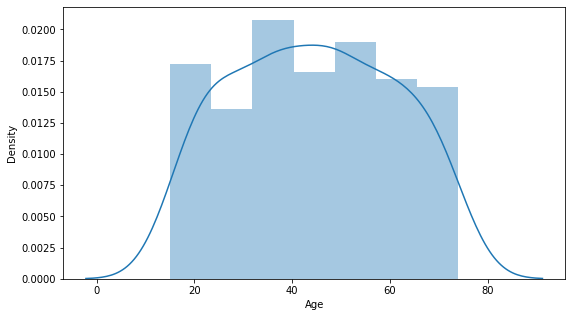

In [16]:
plt.figure(figsize = (9,5))
sns.distplot(drug_data.Age)
plt.show()

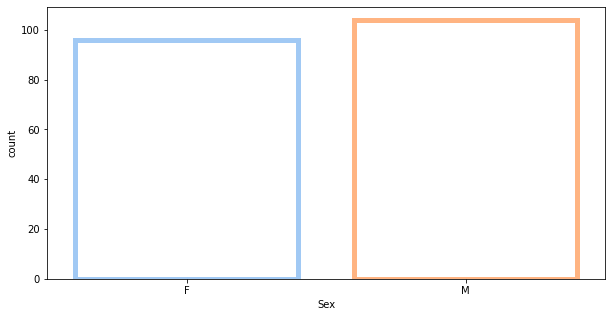

In [34]:
##Sex
plt.figure(figsize=(10,5))
sns.countplot(x = drug_data.Sex, facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("pastel", 3)
             )
plt.show()

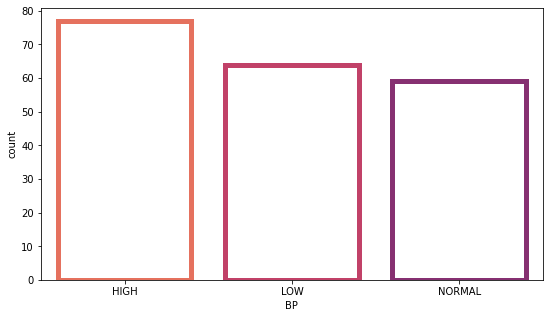

In [33]:

###BP
plt.figure(figsize = (9,5))
sns.countplot(drug_data.BP, facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("flare", 3))
plt.show()

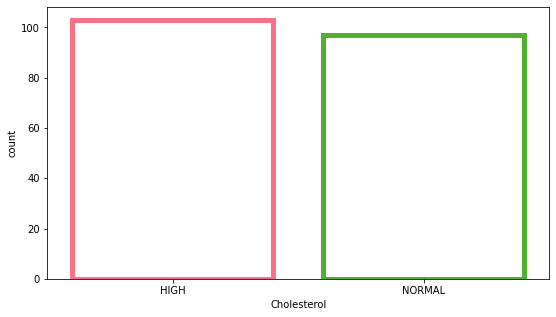

In [37]:
##Cholesterol
plt.figure(figsize = (9,5))
sns.countplot(drug_data.Cholesterol,  facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("husl", 3))
plt.show()

In [38]:
print("Max Na_to_K:",drug_data.Na_to_K.max())
print("Min Na_to_K:",drug_data.Na_to_K.min())
print("Mean Na_to_K:",drug_data.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.084485


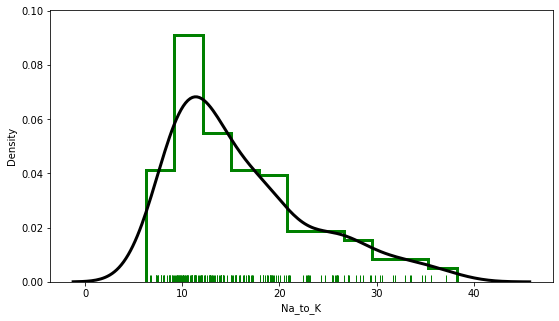

In [41]:
###Na_to_K 
plt.figure(figsize = (9,5))
sns.distplot(drug_data.Na_to_K, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

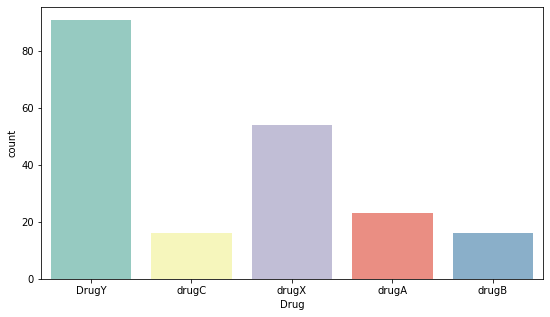

In [49]:
###Na_to_K 
plt.figure(figsize = (9,5))
sns.countplot(x=drug_data.Drug,palette="Set3")
plt.show()

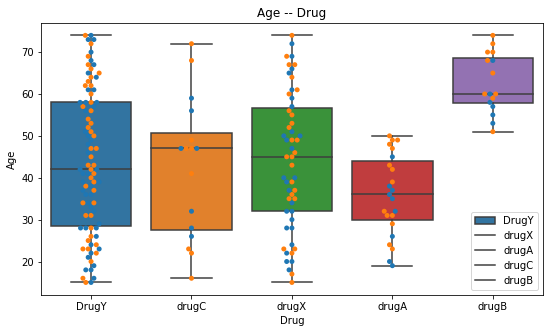

In [54]:
###Age to Drug ratio

plt.figure(figsize = (9,5))
sns.boxplot(x="Drug", y="Age", data=drug_data, whis=np.inf)
sns.swarmplot(x = "Drug", y = "Age",data = drug_data, hue="Sex"
             )
plt.legend(drug_data.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

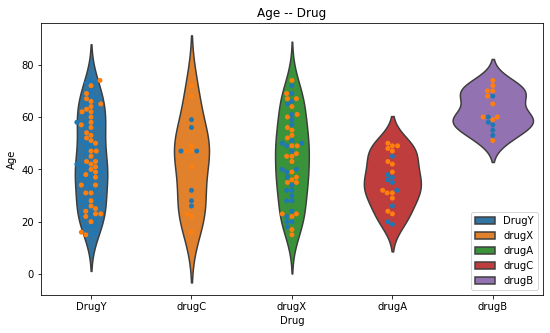

In [55]:
###Age to Drug ratio

plt.figure(figsize = (9,5))

sns.violinplot(x="Drug", y="Age", data=drug_data, inner=None)
sns.swarmplot(x = "Drug", y = "Age",data = drug_data, hue="Sex"
             )
plt.legend(drug_data.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()